In [1]:
%matplotlib ipympl

from QSMLearn import models

from pathlib import Path

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [2]:
def image_transform(img: np.ndarray):
    return np.flip(img).T


def show_example(img, point):
    bounds = [np.max(img), np.min(img)]

    max_val = 0.15 # np.max(np.abs(bounds))
    min_val = -0.15 # -np.max(np.abs(bounds))

    fig, axs = plt.subplots(2, 2)

    INDS = [
        (0, 1), # axial
        (1, 0), # sagital
        (1, 1), # coronal
    ]
    slices = [
        image_transform(img[:, :, point[2]]), # axial
        image_transform(img[point[0], :, :]), # sagital
        image_transform(img[:, point[1], :]), # coronal
    ]

    for ind, slice in list(zip(INDS, slices)):
        im = axs[ind].imshow(
            slice,
            cmap='gray',
            vmax=max_val,
            vmin=min_val
        )
        axs[ind].axis('off')

    axs[0, 0].axis('off')
    fig.colorbar(im, ax=axs.ravel().tolist())

    return fig, axs

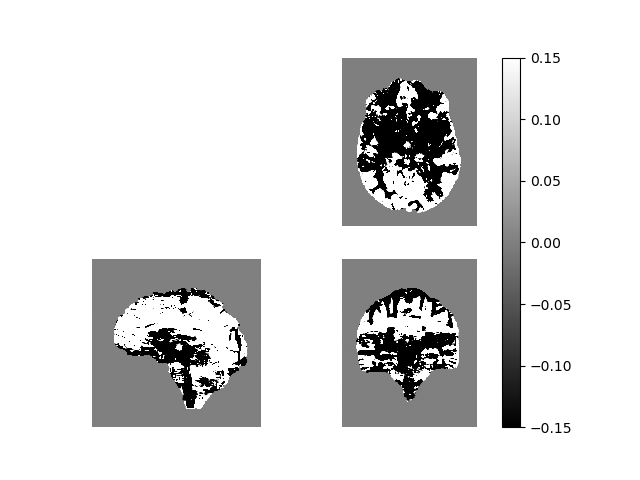

In [5]:
freqpath = Path(r"C:\Users\bozth\Documents\UCL\MRes_Project\QSM-ML\data\Sim2Snr2\Frequency.nii.gz")
freqnii = nib.load(freqpath)
freqimg = freqnii.get_fdata()

fig, axs = show_example(freqimg, [82, 93, 100])
# fig.show()

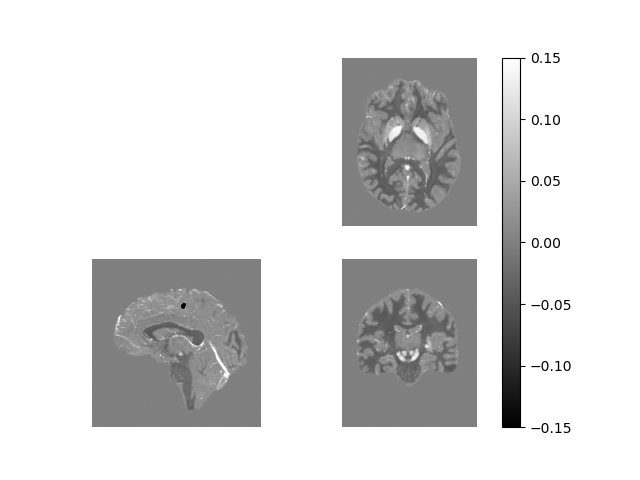

In [4]:
gtpath = Path(r"C:\Users\bozth\Documents\UCL\MRes_Project\QSM-ML\data\Sim2Snr2\GT\Chi.nii.gz")
gtnii = nib.load(gtpath)
gtimg = gtnii.get_fdata()

fig, axs = show_example(gtimg, [82, 100, 100])

In [6]:
checkpointdir = Path(r"C:\Users\bozth\Documents\UCL\MRes_Project\QSM-ML\training\logs\20230712-230919")

m = models.VariableStepNDI(iters=200, verbose=True)
m(np.expand_dims(freqimg, 0))
m.load_weights(checkpointdir / 'checkpoint')

Iteration 10/200 complete.
Iteration 20/200 complete.
Iteration 30/200 complete.
Iteration 40/200 complete.
Iteration 50/200 complete.
Iteration 60/200 complete.
Iteration 70/200 complete.
Iteration 80/200 complete.
Iteration 90/200 complete.
Iteration 100/200 complete.
Iteration 110/200 complete.
Iteration 120/200 complete.
Iteration 130/200 complete.
Iteration 140/200 complete.
Iteration 150/200 complete.
Iteration 160/200 complete.
Iteration 170/200 complete.
Iteration 180/200 complete.
Iteration 190/200 complete.
Iteration 200/200 complete.


In [7]:
for layer in m.layers:
    print(layer.get_weights())

[]
[0.26436916]
[0.26440674]
[0.26441705]
[0.2644223]
[0.26442623]
[0.26442888]
[0.264431]
[0.26443234]
[0.2644333]
[0.26443404]
[0.2644345]
[0.26443473]
[0.2644349]
[0.2644352]
[0.2644352]
[0.26443544]
[0.2644352]
[0.26443496]
[0.26443493]
[0.26443484]
[0.26443473]
[0.26443455]
[0.26443428]
[0.26443404]
[0.26443386]
[0.26443347]
[0.26443312]
[0.2644329]
[0.2644326]
[0.2644323]
[0.26443186]
[0.26443186]
[0.26443154]
[0.26443118]
[0.26443094]
[0.2644307]
[0.26443037]
[0.26443022]
[0.26443002]
[0.26442984]
[0.26442948]
[0.2644293]
[0.26442906]
[0.26442853]
[0.2644284]
[0.264428]
[0.26442805]
[0.2644277]
[0.2644276]
[0.2644273]
[0.26442719]
[0.2644269]
[0.26442692]
[0.26442674]
[0.26442638]
[0.26442608]
[0.2644261]
[0.2644259]
[0.26442537]
[0.2644252]
[0.26442498]
[0.2644249]
[0.26442456]
[0.26442435]
[0.2644242]
[0.26442412]
[0.264424]
[0.26442385]
[0.26442358]
[0.26442346]
[0.26442322]
[0.26442304]
[0.26442298]
[0.26442283]
[0.26442268]
[0.2644225]
[0.26442227]
[0.26442224]
[0.26442185]

In [8]:
img = np.expand_dims(freqimg * 0.004, 0)

In [9]:
learned_img = m(img).numpy()
learned_img = learned_img[0,:,:,:]


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

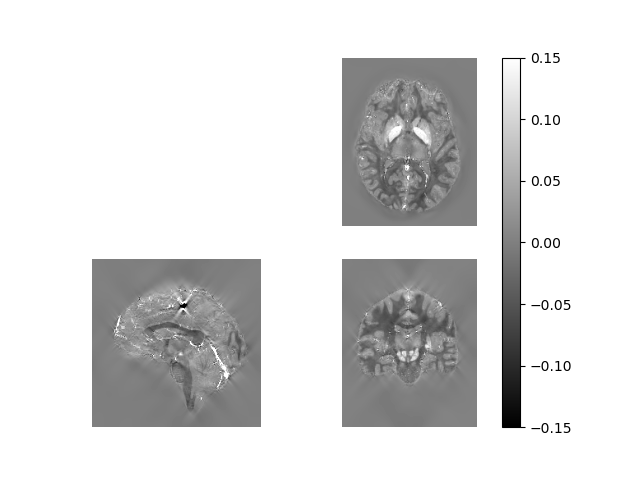

In [13]:
fig, axs = show_example(learned_img, [82, 100, 100])
fig.savefig(r"C:\Users\bozth\Documents\UCL\MRes_Project\Media\images\trained_NDI_20230712-230919.png")

In [16]:
untrained = models.VariableStepNDI(iters=50)
untrained_img = untrained(img)[0, :, :, :].numpy()


Iteration 10/50 complete.
Iteration 20/50 complete.
Iteration 30/50 complete.
Iteration 40/50 complete.
Iteration 50/50 complete.


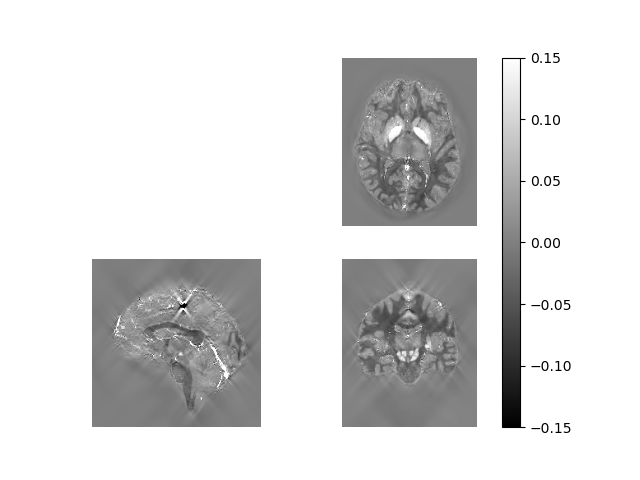

In [17]:

fig, axs = show_example(untrained_img, [82, 100, 100])
fig.savefig(r"C:\Users\bozth\Documents\UCL\MRes_Project\Media\images\untrained_NDI_50_iterations.png")

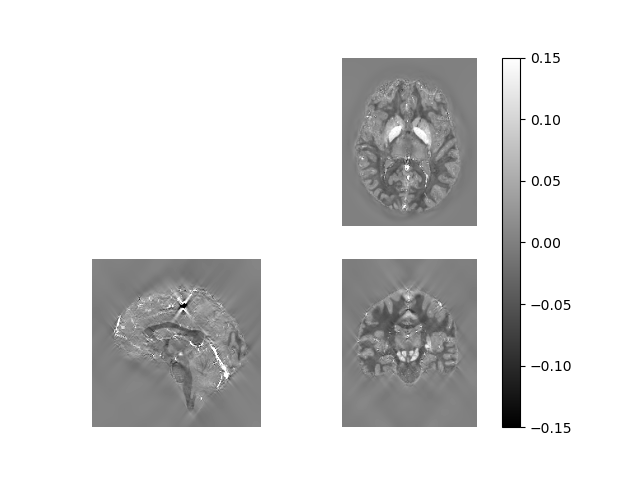

In [12]:
ngtpath = Path(r"C:\Users\bozth\Documents\UCL\MRes_Project\Data\Patrick_NDI_results\NDI_50_iterations.nii")
ngtnii = nib.load(ngtpath)
ngtimg = ngtnii.get_fdata()

fig, axs = show_example(ngtimg, [82, 100, 100])
fig.savefig(r"C:\Users\bozth\Documents\UCL\MRes_Project\Media\images\patrick_NDI_50_iterations.png")